### Import and read excel file 
- 0.a)

In [1]:
import pandas as pd


file_path_riket = ("../Labb2/riket2023_åk9_np.xlsx")

# Read the different sheets from the Excel file, skipping the first 8 rows, and store it in a DataFrame.
df_riket_engelska = pd.read_excel(file_path_riket, sheet_name='Engelska', skiprows=8)
df_riket_matematik = pd.read_excel(file_path_riket, sheet_name='Matematik', skiprows=8)
df_riket_svenska = pd.read_excel(file_path_riket, sheet_name='Svenska', skiprows=8)
df_riket_andra_språk = pd.read_excel(file_path_riket, sheet_name='Svenska som andraspråk', skiprows=8)



## Name change columns

- 0.a)

In [2]:
# Changing names on columns
df_riket_engelska.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_matematik.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_svenska.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_andra_språk.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']

df_riket_matematik

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


### F in mathematics 

- 0.b)


In [3]:
# Copy the dataFrame to a new dataFrame for F grade calculations
df_f_math = df_riket_matematik.copy()

# Clean the column names by removing spaces
df_f_math.columns = [col.strip() for col in df_f_math.columns]

# replace '~100' with '100' 
df_f_math.replace('~100', 100, inplace=True)

# Make selected columns numeric, turn errors into NaN
columns_to_convert = ['Flickor (A-F)', 'Pojkar (A-F)', 'Flickor (A-E)', 'Pojkar (A-E)']
for column in columns_to_convert:
    df_f_math[column] = pd.to_numeric(df_f_math[column], errors='coerce')

# Calculate the number of girls with F grades by subtracting the estimated number of girls with A-E from the total.
df_f_math['Flickor (F)'] = df_f_math['Flickor (A-F)'] - (df_f_math['Flickor (A-F)'] * (df_f_math['Flickor (A-E)'] / 100)).round()
df_f_math['Pojkar (F)'] = df_f_math['Pojkar (A-F)'] - (df_f_math['Pojkar (A-F)'] * (df_f_math['Pojkar (A-E)'] / 100)).round()
# Sum the F grades for girls and boys to get the total number of students with F grades.
df_f_math['Totalt (F)'] = df_f_math['Flickor (F)'] + df_f_math['Pojkar (F)']

df_f_math

C:\Users\utjis\AppData\Local\Temp\ipykernel_14744\3816872280.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_f_math.replace('~100', 100, inplace=True)


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng),Flickor (F),Pojkar (F),Totalt (F)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0,5825.0,5798.0,11623.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7,4967.0,5034.0,10001.0
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1,869.0,742.0,1611.0
3,Riket,Skolverket,50,25,25,100.0,100.0,100.0,14.1,13.5,14.7,0.0,0.0,0.0


## Barplot total points

- 0.c)
- 


In [4]:
import matplotlib.pyplot as plt

## Data cleaning and preparing data for plotting

# Converts the total points from different subjects into lists for plotting
math_total = df_riket_matematik['Totalt (Poäng)'].tolist()  
english_total = df_riket_engelska['Totalt (Poäng)'].tolist()  
swedish_total = df_riket_svenska['Totalt (Poäng)'].tolist()  
other_lang_total = df_riket_andra_språk['Totalt (Poäng)'].tolist()

# Create a new DataFrame combining all subjects
combined_df = pd.DataFrame({'Matte':math_total, 'Engelska': english_total, 'Svenska': swedish_total, 'Svenska som andraspråk': other_lang_total})

# Make a clean copy of the combined DataFrame
combined_cleaned = pd.DataFrame(combined_df)

# Converts 'svenska som andraspråk' to numeric, changing errors to NaN
combined_cleaned['Svenska som andraspråk'] = pd.to_numeric(combined_cleaned['Svenska som andraspråk'], errors='coerce')




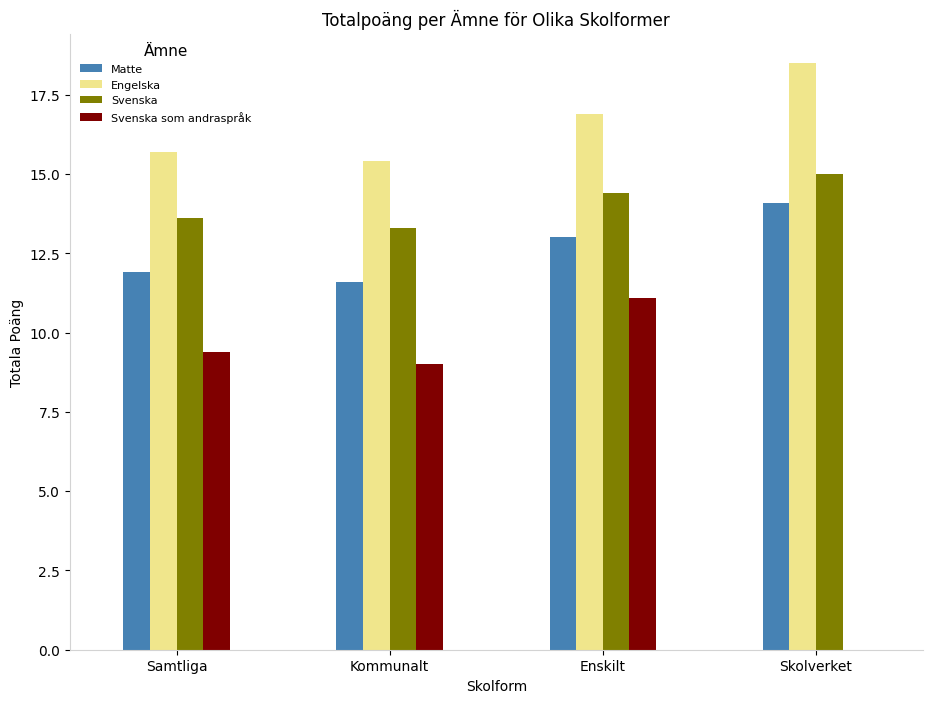

In [5]:
combined_cleaned.index = ['Samtliga', 'Kommunalt', 'Enskilt', 'Skolverket'] # Set new index for dataframe


colors = ['steelblue', 'khaki', 'olive', 'maroon'] # color palette for the bar plot

ax_combined = combined_cleaned.plot(kind='bar', figsize=(11, 8), color=colors) # plot the dataframe as a barchart

plt.title('Totalpoäng per Ämne för Olika Skolformer')
plt.xlabel('Skolform')
plt.ylabel('Totala Poäng')

plt.xticks(rotation=0) # rotate the x-axis tick labels 
plt.legend(title='Ämne', fontsize=8, loc='upper left', title_fontsize='11', frameon=False) # customize the legend

# remove some spines and change clolor on the ones that are left
ax_combined.spines['top'].set_visible(False)
ax_combined.spines['right'].set_visible(False)
ax_combined.spines['bottom'].set_color('lightgray')
ax_combined.spines['left'].set_color('lightgray')

plt.show()

## Total points subplots
- d.)

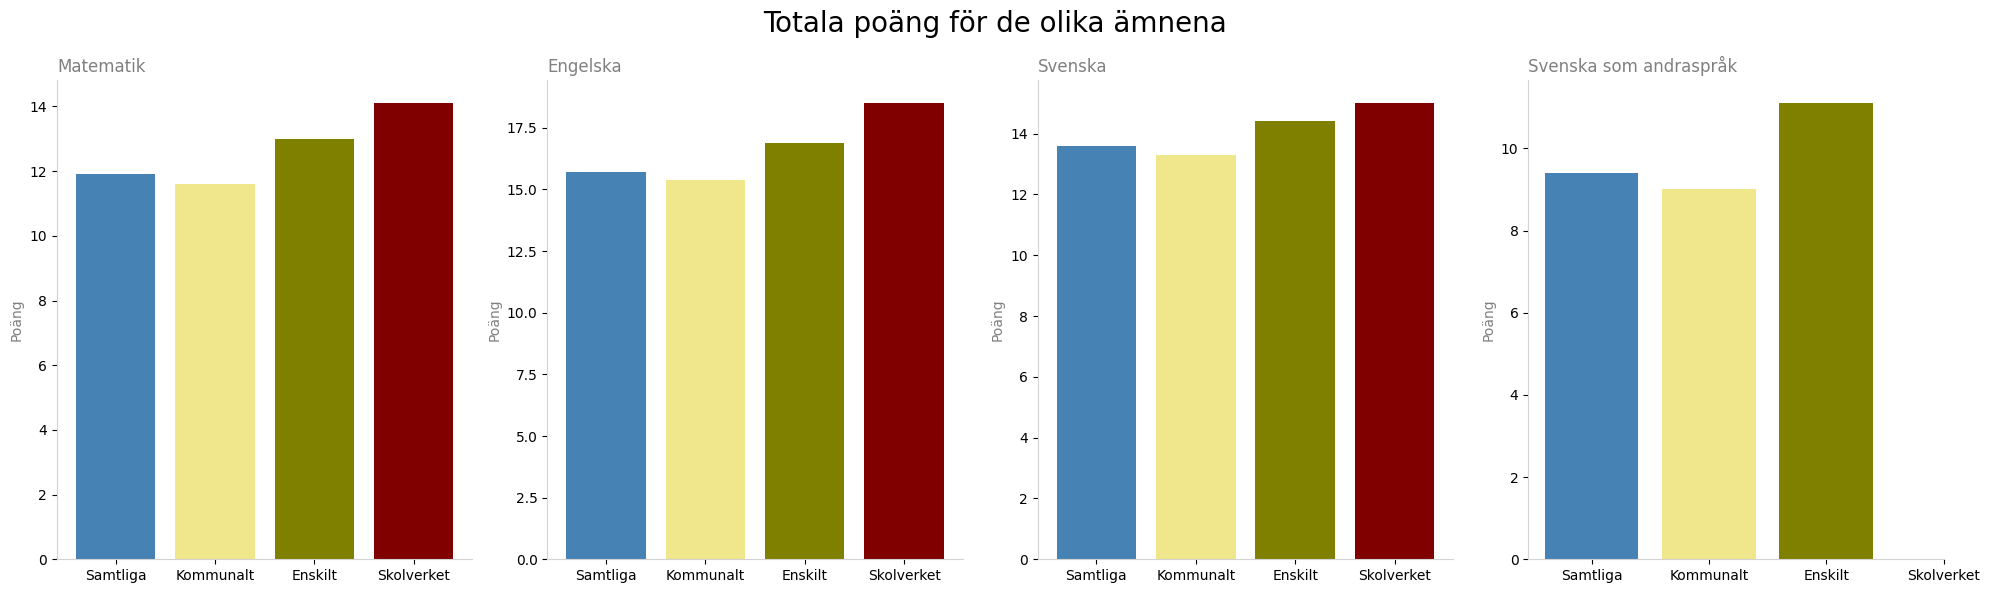

In [48]:
import numpy as np

# Convert other language total scores to float, setting ".." as NaN
cleaned_other_lang_total = [np.nan if x == '..' else float(x) for x in other_lang_total]

subjects = [('Matematik', math_total), ('Engelska', english_total), ('Svenska', swedish_total), ('Svenska som andraspråk', cleaned_other_lang_total)] # define the subjects
labels = ['Samtliga', 'Kommunalt', 'Enskilt', 'Skolverket']  # labels for x-axis
tick_positions = range(len(labels))  # positions for each x-axis label

fig, axes = plt.subplots(1, 4, figsize=(20, 6))  # Creates 4 subplots

# Loop through each subject and its totals to create individual bar charts
for ax, (title, totals) in zip(axes, subjects):
    ax.bar(tick_positions, totals, color=colors)  # Plot bars at predefined postitions.
    ax.set_title(title, loc="left", color= 'grey')
    ax.set_xticks(tick_positions)  # Set the positions for the x-ticks
    ax.set_xticklabels(labels, rotation=0) 
    ax.set_ylabel('Poäng', color='grey')
    # Hide the right and top spines for a cleaner look
    ax.spines.right.set_visible(False) 
    ax.spines.top.set_visible(False)
    # Set the color of the bottom and left spines
    ax.spines['bottom'].set_color('lightgray')
    ax.spines['left'].set_color('lightgray')
    
    fig.suptitle('Totala poäng för de olika ämnena', fontsize= 20) # adds a title for the entire figure 

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()
plt.show()
